# KNN - Vecinos más próximos
Este es un método de clasificación no paramétrico, que estima el valor de la función de densidad de probabilidad o directamente la probabilidad a posteriori de que un elemento $x$ pertenezca a la clase $C_{j}$ a partir de la información proporcionada por el conjunto de prototipos. En el proceso de aprendizaje no se hace ninguna suposición acerca de la distribución de las variables predictoras. En el reconocimiento de patrones, el algoritmo $k-nn$ es usado como método de clasificación de objetos (elementos) basado en un entrenamiento mediante ejemplos cercanos en el espacio de los elementos.

El presente **notebook** aplicará este concepto sobre los datos artificiales de la clase para estimar Sexo a partir de Peso y Estatura.

In [1]:
## Lectura y normalización de los datos
X <- readRDS("X.rds")
X[,c(1:3)] <- X[,c(1:3)]/100

## Recodificación de la variable sexo
X$G <- substr(X$Sexo, 1, 1)
X$g <- as.numeric(X$G=="M")

head(X)

Edad,Estatura,Peso,Sexo,Mascotas,Digitos.Cedula,G,g
0.33,1.78,0.90,Masculino,2,96,M,1
0.26,1.60,0.67,Femenino,2,91,F,0
0.34,1.86,0.94,Masculino,2,59,M,1
0.26,1.86,0.83,Masculino,1,43,M,1
0.25,1.76,0.65,Masculino,3,97,M,1
0.30,1.75,0.82,Masculino,0,60,M,1


## A. Sexo a partir de estatura y peso

El siguiente gráfico premite una visualización de los datos de estatura contra peso, dónde además los puntos negros representan sujetos de sexo masculino y los azules femeninos. 

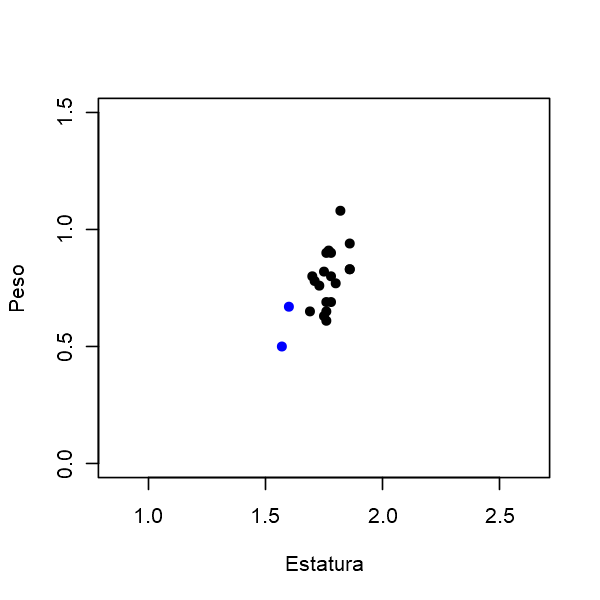

In [3]:
## Escalamiento de la imagen
library(repr); options(repr.plot.width=5, repr.plot.height=5)

## definición del gráfico
plot(X$Estatura, X$Peso, type = "n", xlab="Estatura", ylab="Peso",asp=1,
xlim=c(1,2.5),ylim=c(0,1.5))
cols <- rep("blue",nrow(X))
cols[which(X$G=="M")] <- "black"
#text(X$Estatura, X$Peso, X$G, col=cols)
points(X$Estatura, X$Peso, pch=16, col=cols)

La intensión ahora es generar puntos de forma aleatoria dentro de los límites del gráfico anterior, buscando etiquetar cada uno de ellos como masculino o femenino, dependiendo de su cercanía a $k$ de los puntos ya conocidos. La definición de la etiqueta estará dada por la clase del grupo mayoritario dentro de los $k$ vecinos seleccionados, razón por la cual será necesario siempre escoger una cantidad impar de vecinos, evitando así caer en empates (sin grupo mayoritario).

Para ello resulta necesario definir la siguiente función generadora de puntos:



In [4]:
## Límites de simulación
lims <- c(1, 2.5,#Estatura, eje X
          0, 1.5) #Peso, eje Y

## Función generadora de puntos
nuevopunto <- function(lims=lims){
  a <- runif(1,lims[1],lims[2])
  b <- runif(1,lims[3],lims[4])
  return(c(a, b))
}

Debido a que nuestros datos de estudio únicamente contenen dos sujetos de sexo feminino, nuestra única opción será definir $k=3$. 

El siguiente algoritmo realiza la clasificación de cada punto (generado de forma aleatoria por la función anterior), al encontrar los $k=3$ vecinos mas cercanos y con ellos determinar el grupo con la clase predominante, asignándosela finalmente al punto. En este caso particular se han generado 20000 puntos, donde la región negra representa todos los puntos que fueron clasificados como de sexo masculino, y la gris como femenino. 


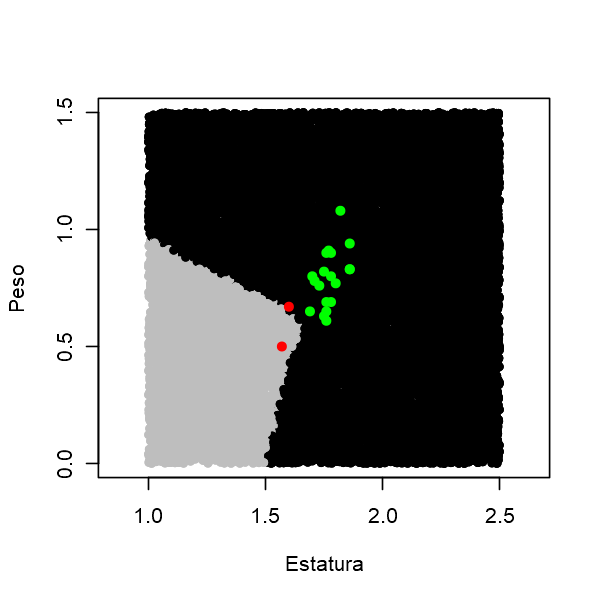

In [5]:
## Gráfico
plot(X$Estatura, X$Peso, type = "n", xlab="Estatura", ylab="Peso",asp=1,
xlim=c(1,2.5),ylim=c(0,1.5))

## K-vecinos a considerar
k <- 3

## Algoritmo de clasificación
for(iter in 1:20000){
  x <- nuevopunto(lims)
  diss <- dist(rbind(x,X[,c(2,3)]))[1:21]
  knn <- head(order(diss),k)
  etiqueta <- names(sort(table(X$G[knn]),decreasing = TRUE))[1]
  clase <- as.numeric(etiqueta=="M")
  for(inn in 1:k){
    if(X$G[knn[inn]]==etiqueta){
      points(x[1],x[2],col=c("gray","black")[clase+1],pch=20)
    }
  }
}

## Datos de entrenamiento
cols2 <- rep("red",nrow(X))
cols2[which(X$G=="M")] <- "green"
points(X$Estatura, X$Peso, pch=16, col=cols2)

Es importante notar que al menos para este problema, el algoritmo $k-nn$ resulta ser un muy buen clasificador; tanto puntos verdes (hombres) como rojos (mujeres) quedaron bien clasificados.


## B. Índice de masa corporal
Consideremos ahora el índice de masa corporal ($IMC$) de cada persona, con la que definimos si una persona está en condición de obesidad o no, sinedo obesa una persona cuyo $IMC>25$. Ahora tomemos dicha característica como objetivo a segmentar, a partir de la estatura y peso. 

In [8]:
## Gordos y delgados
X$IMC <- (X$Peso*100)/((X$Estatura)^2)
X$Obesidad <- ifelse(X$IMC >= 25, "Obeso", "Normal")
head(X)

Edad,Estatura,Peso,Sexo,Mascotas,Digitos.Cedula,G,g,Obesidad,IMC
0.33,1.78,0.90,Masculino,2,96,M,1,Obeso,28.40550
0.26,1.60,0.67,Femenino,2,91,F,0,Obeso,26.17187
0.34,1.86,0.94,Masculino,2,59,M,1,Obeso,27.17077
0.26,1.86,0.83,Masculino,1,43,M,1,Normal,23.99121
0.25,1.76,0.65,Masculino,3,97,M,1,Normal,20.98399
0.30,1.75,0.82,Masculino,0,60,M,1,Obeso,26.77551


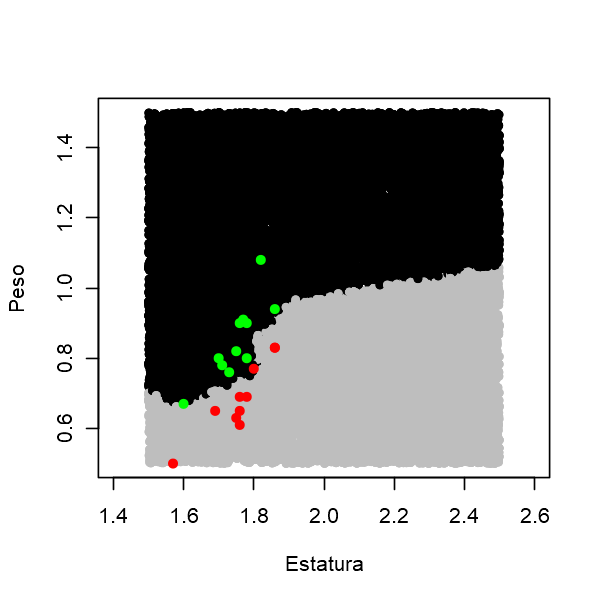

In [9]:
## Límites de simulación
lims <- c(1.5, 2.5,#Estatura, eje X
          0.5, 1.5) #Peso, eje Y

## Gráfico
plot(X$Estatura, X$Peso, type = "n", xlab="Estatura", ylab="Peso",asp=1,
     xlim=lims[1:2],ylim=lims[3:4])

## K-vecinos a considerar
k <- 3

## Algoritmo de clasificación
for(iter in 1:20000){
     x <- nuevopunto(lims)
     diss <- dist(rbind(x,X[,c(2,3)]))[1:21]
     knn <- head(order(diss),k)
     etiqueta <- names(sort(table(X$Obesidad[knn]),decreasing = TRUE))[1]
     clase <- as.numeric(etiqueta=="Obeso")
     for(inn in 1:k){
          if(X$Obesidad[knn[inn]]==etiqueta){
               points(x[1],x[2],col=c("gray","black")[clase+1],pch=20)
          }
     }
}

## Datos de entrenamiento
cols2 <- rep("red",nrow(X))
cols2[which(X$Obesidad=="Obeso")] <- "green"
points(X$Estatura, X$Peso, pch=16, col=cols2)